# 電場をプロット

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/kentakom1213/practice-datavisualization/blob/main/matplotlib_epotential.ipynb)

おまけです。こんなこともできるよーって感じ。

In [29]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.gridspec import GridSpec

In [3]:
class EField:
    def __init__(self, x=None, y=None):
        self.K = 9.0e+9

        # initialize the region of the electoric field
        if not(x):
            x = (-1, 1)
        if not(y):
            y = (-1, 1)

        # e-potential
        self.xrange, self.yrange = x, y

        self.x, self.y = np.meshgrid(np.linspace(
            *x, (x[1] - x[0])*50), np.linspace(*y, (y[1] - y[0])*50))  # generate meshgrid
        self.r = np.sqrt(self.x**2 + self.y**2)  # distance from Origin
        self.potential = self.r * 0

        # e-field
        self.x_field, self.y_field = np.meshgrid(np.linspace(
            *x, (x[1] - x[0])*5), np.linspace(*y, (y[1] - y[0])*5))
        self.r_field = np.sqrt(self.x_field**2 + self.y_field**2)
        self.fields = [self.r_field * 0, self.r_field * 0]  # x -> u, y -> v

    def add_charge(self, position, Q):
        # e-potential
        d = np.sqrt((self.x - position[0])**2 + (self.y - position[1])**2)
        e_potentioal = self.K * Q / d  # calculate e-potential
        # mask
        lim = e_potentioal[d < 0.05][0]
        if lim > 0:
            e_potentioal = np.clip(e_potentioal, None, lim)
        else:
            e_potentioal = np.clip(e_potentioal, lim, None)

        self.potential += e_potentioal

        # e-field
        d_field = np.sqrt(
            (self.x_field - position[0])**2 + (self.y_field - position[1])**2)
        e_fields = [self.K * Q * (self.x_field - position[0]) / (d_field**2),
                                  self.K * Q * (self.y_field - position[1]) / (d_field**2)]
        length = np.sqrt(e_fields[0] ** 2 + e_fields[1] ** 2)
        e_fields = [f / length for f in e_fields]
        self.fields[0] += e_fields[0]
        self.fields[1] += e_fields[1]

## 図の描画

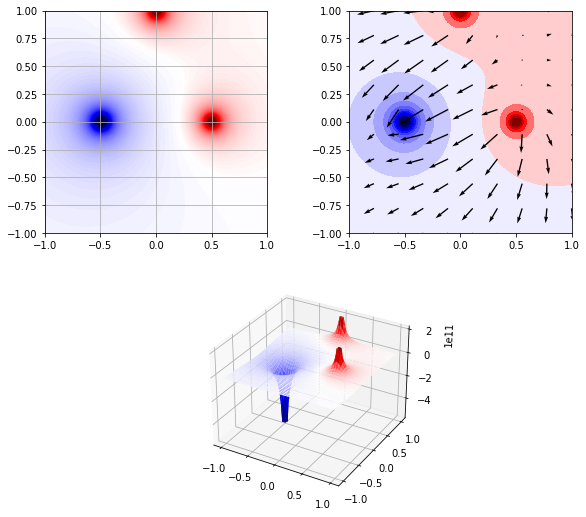

In [34]:

from matplotlib import gridspec


x, y = (-1, 1), (-1, 1)
f = EField(x=x, y=y)
f.add_charge((0.5, 0.), 1.0)
f.add_charge((-0.5, 0.), -3.0)
f.add_charge((0., 1.0), 1)


# make Figure
fig = plt.figure(figsize=(10, 9))

# grid の設定
gs = GridSpec(2, 2)
grid1 = gs.new_subplotspec((1, 0), colspan=2)
grid2 = gs.new_subplotspec((0, 0))
grid3 = gs.new_subplotspec((0, 1))

# axesの作成
ax1 = fig.add_subplot(grid1, projection="3d")
ax2 = fig.add_subplot(grid2)
ax3 = fig.add_subplot(grid3)

# norm
norm = mpl.colors.TwoSlopeNorm(vcenter=0.0)
cmap = plt.cm.seismic

# ax1
ax1.plot_surface(f.x, f.y, f.potential, cmap=cmap, norm=norm)

# ax2
ax2.imshow(f.potential, interpolation='bilinear', cmap=cmap, norm=norm, origin="lower", extent=[-1.0, 1.0, -1.0, 1.0])
ax2.grid()

# ax3
ax3.contourf(f.x, f.y, f.potential, 20,  cmap=cmap, norm=norm)
ax3.quiver(f.x_field, f.y_field, f.fields[0], f.fields[1], scale_units='xy', scale=10)
ax3.set_aspect("equal")

plt.show()